<a href="https://colab.research.google.com/github/babankbro/super-ai-2/blob/main/03_Create_Model_Train_Classification_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy  as np
import pandas as pd
from   tqdm   import tqdm
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from IPython.display import clear_output
from scipy.signal import argrelextrema
import ast

import time
from datetime import datetime,date

print("github")

In [ ]:
!git clone https://github.com/Deepinvest-team/deepinvest_open_environment.git
import sys
sys.path.append('/content/deepinvest_open_environment')
from deepinvest_open_environment.Observer import Observers

Cloning into 'deepinvest_open_environment'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [ ]:
#asset01-train
!gdown --id 1ZTBYN2X95Gbn7BDs00g5yd0yElHD7EXj
#asset02-train
!gdown --id 1KQNbGvCIx55pXDqYKJpNz4WCBysB7K2f
#asset03-train
!gdown --id 1GLBpMx3IKYIuSLHx7YnCZOyGhR3s8Ltx
#asset04-train
!gdown --id 1OIeQxLux82kOhhE5hvlVZ4wZF8Fnt1z2
#asset05-train
!gdown --id 1HzrH0moXbxX55ubM0PfCkirN25sDGBJ2
#asset01-test
!gdown --id 1Cw09m5KSlufvGe2rZammVbUVc4_BuGwh
#asset02-test
!gdown --id 1e6uSE8SK9DuVNL7rChNQbzEqwgwUgcYq
#asset03-test
!gdown --id 1Md4NyOY93p24v5V7clKCQ7ygqlsfSfEk
#asset04-test
!gdown --id 1cNxX-M7Iw-7oTTpU2iBVYzfxwQiRICjm
#asset05-test
!gdown --id 1WGepF5-F4uCw8hcwlwc6RdywAxVrJHll

Downloading...
From: https://drive.google.com/uc?id=1ZTBYN2X95Gbn7BDs00g5yd0yElHD7EXj
To: /content/Asset01_train.csv
100% 217k/217k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KQNbGvCIx55pXDqYKJpNz4WCBysB7K2f
To: /content/Asset02_train.csv
100% 212k/212k [00:00<00:00, 85.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GLBpMx3IKYIuSLHx7YnCZOyGhR3s8Ltx
To: /content/Asset03_train.csv
100% 211k/211k [00:00<00:00, 40.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OIeQxLux82kOhhE5hvlVZ4wZF8Fnt1z2
To: /content/Asset04_train.csv
100% 221k/221k [00:00<00:00, 76.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HzrH0moXbxX55ubM0PfCkirN25sDGBJ2
To: /content/Asset05_train.csv
100% 217k/217k [00:00<00:00, 39.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Cw09m5KSlufvGe2rZammVbUVc4_BuGwh
To: /content/Asset01_test.csv
100% 43.3k/43.3k [00:00<00:00, 45.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e6uSE8SK9Du

In [ ]:
observers = Observers(30,train=True)
observers_test = Observers(30, train=False)

In [ ]:
!pip install ta -q

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from sklearn.preprocessing import RobustScaler
plt.style.use("bmh")

# Technical Analysis library
import ta

# Neural Network library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
def change_to_datetime(df):
  df['Date'] = pd.to_datetime(df.index)
  df.set_index('Date', inplace=True)

def reset_data():
    df_a1 = observers.getDataset()['Asset01']
    df_a2 = observers.getDataset()['Asset02']
    df_a3 = observers.getDataset()['Asset03']
    df_a4 = observers.getDataset()['Asset04']
    df_a5 = observers.getDataset()['Asset05']

    # Loading the test data
    df_test_a1 = observers_test.getDataset()['Asset01']
    df_test_a2 = observers_test.getDataset()['Asset02']
    df_test_a3 = observers_test.getDataset()['Asset03']
    df_test_a4 = observers_test.getDataset()['Asset04']
    df_test_a5 = observers_test.getDataset()['Asset05']

    change_to_datetime(df_a1)
    change_to_datetime(df_a2)
    change_to_datetime(df_a3)
    change_to_datetime(df_a4)
    change_to_datetime(df_a5)
    change_to_datetime(df_test_a1)
    change_to_datetime(df_test_a2)
    change_to_datetime(df_test_a3)
    change_to_datetime(df_test_a4)
    change_to_datetime(df_test_a5)

    return [[df_a1, df_a2, df_a3, df_a4, df_a5], [df_test_a1, df_test_a2, df_test_a3, df_test_a4, df_test_a5]]

In [ ]:
# Loading in the Data
train_dfs, test_dfs = reset_data()
df_a1, df_a2, df_a3, df_a4, df_a5 = train_dfs[0], train_dfs[1], train_dfs[2], train_dfs[3], train_dfs[4]
df_test_a1, df_test_a2, df_test_a3, df_test_a4, df_test_a5 = test_dfs[0], test_dfs[1], test_dfs[2], test_dfs[3], test_dfs[4]

In [ ]:
train_dfs[1]

,open,high,low,close,volume
Date,,,,,
2010-01-04,79.076464,81.112217,79.076464,80.943401,263542
2010-01-05,81.062562,81.429993,80.387288,81.201588,258887
2010-01-06,80.863955,82.939423,80.287985,82.601790,370059
2010-01-07,82.621648,82.780539,81.688187,82.085408,246632
2010-01-08,82.075476,82.889775,81.231386,82.174779,310377
...,...,...,...,...,...
2019-12-24,60.208543,60.734858,60.049655,60.685206,204535
2019-12-26,60.774581,61.400202,60.635554,61.251243,265091
2019-12-27,61.300895,61.539228,60.814303,61.290966,351899


In [ ]:
df = ta.add_all_ta_features(df_a1.copy(), open="open", high="high", low="low", close="close", volume="volume", fillna=True)
#df.drop(['open', 'high', 'low', 'volume'], axis=1, inplace=True)
df.tail()

/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,10.724959,10.729214,10.705133,10.720703,22030,-4.977733e+06,1961976,-0.042186,-71.232789,-0.142720,...,0.097343,0.118431,-0.021088,-3.564664,-0.985530,-2.579134,10.728500,-0.039677,-0.039685,-23.079432
2019-12-26,10.725442,10.743624,10.717705,10.732599,10530,-4.976162e+06,1972506,-0.056145,-43.162195,3.320840,...,0.089283,0.112601,-0.023318,-8.883290,-2.565082,-6.318208,10.728636,0.110960,0.110898,-22.994081
2019-12-27,10.732502,10.820414,10.729311,10.808615,36676,-4.948986e+06,2009182,0.014947,361.285330,10.978739,...,0.138421,0.117765,0.020656,-6.036332,-3.259332,-2.777000,10.731308,0.708274,0.705778,-22.448668
2019-12-30,10.808035,10.851749,10.804070,10.830376,36372,-4.945223e+06,2045554,0.001290,422.739998,6.953824,...,0.191427,0.132497,0.058930,-3.860014,-3.379468,-0.480545,10.737906,0.201324,0.201122,-22.292538
2019-12-31,10.830376,10.869738,10.829505,10.846720,32207,-4.949868e+06,2077761,-0.040911,437.549393,2.712231,...,0.242810,0.154560,0.088250,-3.201141,-3.343803,0.142661,10.744312,0.150913,0.150799,-22.175268


In [ ]:
## Scaling

# Scale fitting the close prices separately for inverse_transformations purposes later
close_scaler = RobustScaler()

close_scaler.fit(df[['close']])

# Normalizing/Scaling the DF
scaler = RobustScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [ ]:
df.tail()

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,-0.573337,-0.596781,-0.566765,-0.576166,-0.954252,-1.519866,0.357588,-0.088296,-0.018813,-0.009475,...,0.194710,0.228453,-0.091899,-0.391643,-0.025961,-0.797412,-0.604418,-0.067643,-0.067598,-0.576166
2019-12-26,-0.573097,-0.589665,-0.560478,-0.570272,-1.165455,-1.519326,0.363892,-0.160696,-0.002222,0.521954,...,0.183779,0.220130,-0.102068,-1.123500,-0.274618,-1.999431,-0.604349,0.159018,0.158991,-0.570272
2019-12-27,-0.569603,-0.551746,-0.554674,-0.532608,-0.685271,-1.509979,0.385850,0.208023,0.236823,1.696940,...,0.250419,0.227502,0.098417,-0.731751,-0.383909,-0.861021,-0.603006,1.057789,1.054132,-0.532608
2019-12-30,-0.532216,-0.536272,-0.517290,-0.521827,-0.690854,-1.508684,0.407626,0.137193,0.273145,1.079379,...,0.322307,0.248534,0.272916,-0.432284,-0.402821,-0.122768,-0.599687,0.294988,0.294755,-0.521827
2019-12-31,-0.521158,-0.527389,-0.504570,-0.513728,-0.767346,-1.510282,0.426909,-0.081687,0.281898,0.428573,...,0.391991,0.280031,0.406593,-0.341622,-0.397207,0.077578,-0.596464,0.219135,0.219032,-0.513728


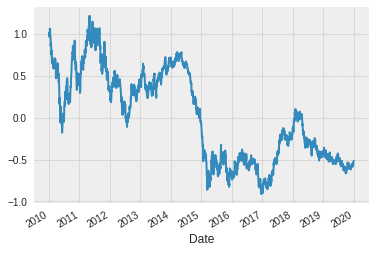

In [ ]:
df['close'].plot()

In [ ]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the multivariate time sequence
    """
    
    # Creating a list for both variables
    X, y = [], []
    
    for i in range(len(seq)):
        
        # Finding the end of the current sequence
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        # Breaking out of the loop if we have exceeded the dataset's length
        if out_end > len(seq):
            break
        
        # Splitting the sequences into: x = past prices and indicators, y = prices ahead
        seq_x, seq_y = seq[i:end, :], seq[end:out_end, 0]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)
  
  
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(16,5))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(16,5))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.7):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass
          
          
def validater(n_per_in, n_per_out):
    """
    Runs a 'For' loop to iterate through the length of the DF and create predicted values for every stated interval
    Returns a DF containing the predicted values for the model with the corresponding index values based on a business day frequency
    """
    
    # Creating an empty DF to store the predictions
    predictions = pd.DataFrame(index=df.index, columns=[df.columns[0]])

    for i in range(n_per_in, len(df)-n_per_in, n_per_out):
        # Creating rolling intervals to predict off of
        x = df[-i - n_per_in:-i]

        # Predicting using rolling intervals
        yhat = model.predict(np.array(x).reshape(1, n_per_in, n_features))

        # Transforming values back to their normal prices
        yhat = close_scaler.inverse_transform(yhat)[0]

        # DF to store the values and append later, frequency uses business days
        pred_df = pd.DataFrame(yhat, 
                               index=pd.date_range(start=x.index[-1], 
                                                   periods=len(yhat), 
                                                   freq="B"),
                               columns=[x.columns[0]])

        # Updating the predictions DF
        predictions.update(pred_df)
        
    return predictions


def val_rmse(df1, df2):
    """
    Calculates the root mean square error between the two Dataframes
    """
    df = df1.copy()
    
    # Adding a new column with the closing prices from the second DF
    df['close2'] = df2.close
    
    # Dropping the NaN values
    df.dropna(inplace=True)
    
    # Adding another column containing the difference between the two DFs' closing prices
    df['diff'] = df.close - df.close2
    
    # Squaring the difference and getting the mean
    rms = (df[['diff']]**2).mean()
    
    # Returning the sqaure root of the root mean square
    return float(np.sqrt(rms))

In [ ]:
!pip install zigzag -q

     |████████████████████████████████| 126 kB 7.6 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import zigzag as zz

def zigzagPlot(X, pivots):
  plt.figure(figsize=(20, 10))
  plt.xlim(0, len(X))
  plt.ylim(X.min()*0.99, X.max()*1.01)
  plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
  plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
  plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='g')
  plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='r')

def create_pivots(df, ratio = .05):
    asset5_closePrices = df['close'].values 
    asset5_closePrices = asset5_closePrices-np.min(asset5_closePrices)
    pivots = zz.peak_valley_pivots(asset5_closePrices, ratio, -ratio)
    return pivots  -np.min(asset5_closePrices)

def create_graph_zz(df, ratio = .05, name="Assetx"):
    asset5_closePrices = df['close'].values
    pivots = zz.peak_valley_pivots(asset5_closePrices, ratio, -ratio)
    pivots.shape, asset5_closePrices.shape

    zigzagPlot(asset5_closePrices, pivots)
    plt.title(name)
    plt.show()
    return pivots


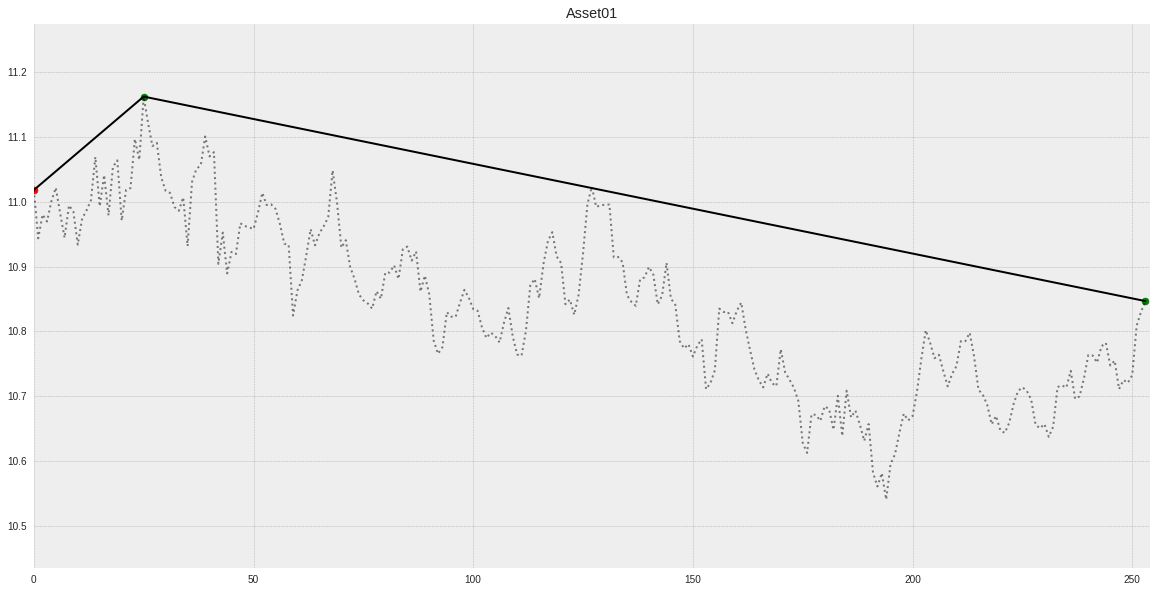

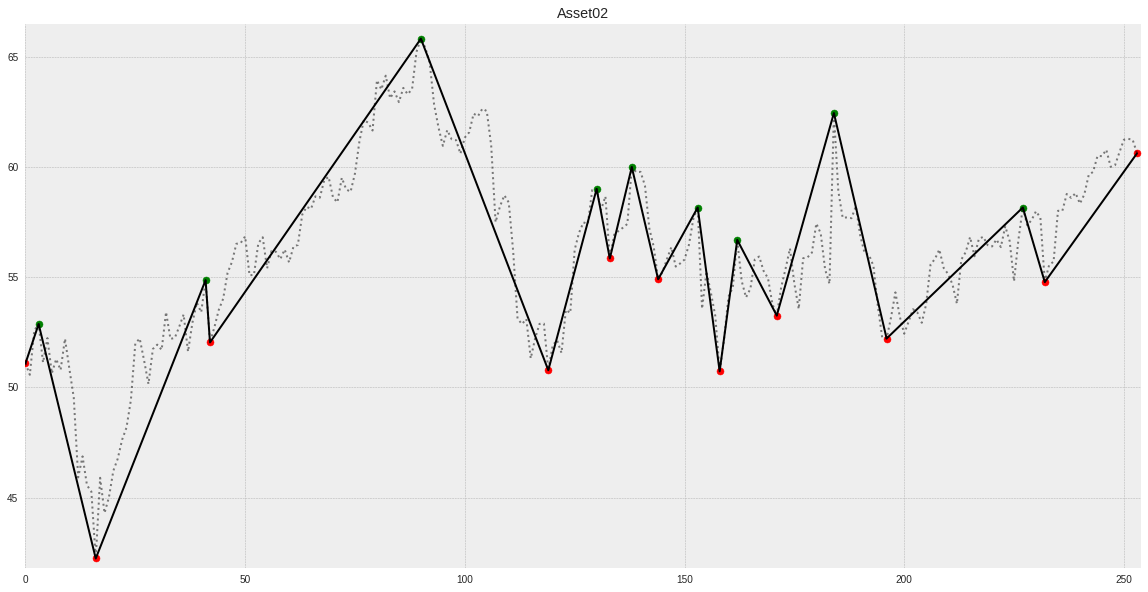

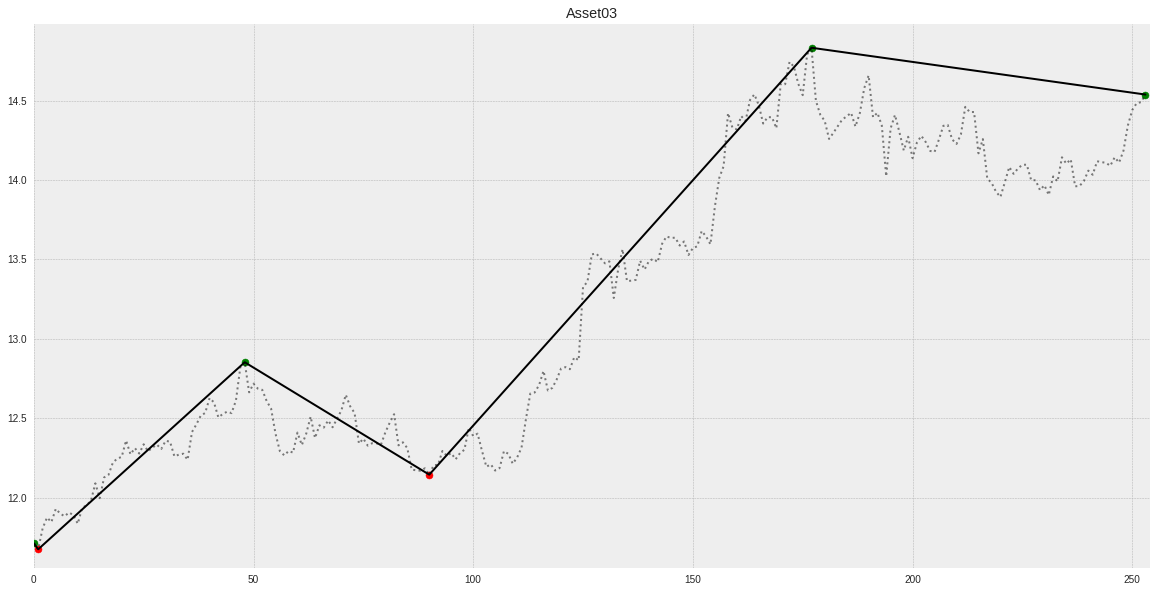

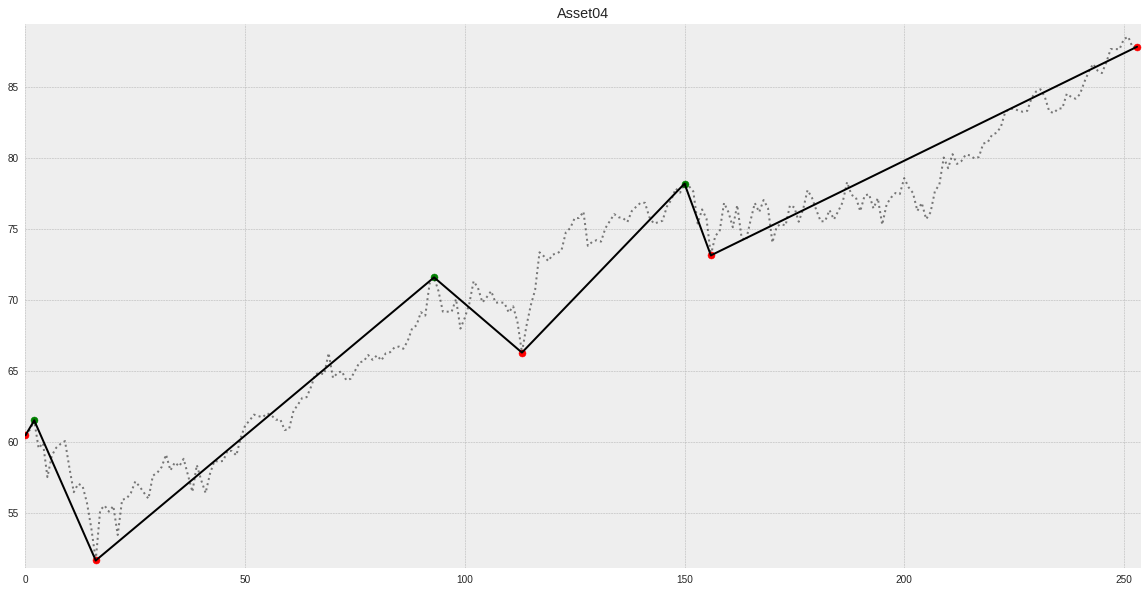

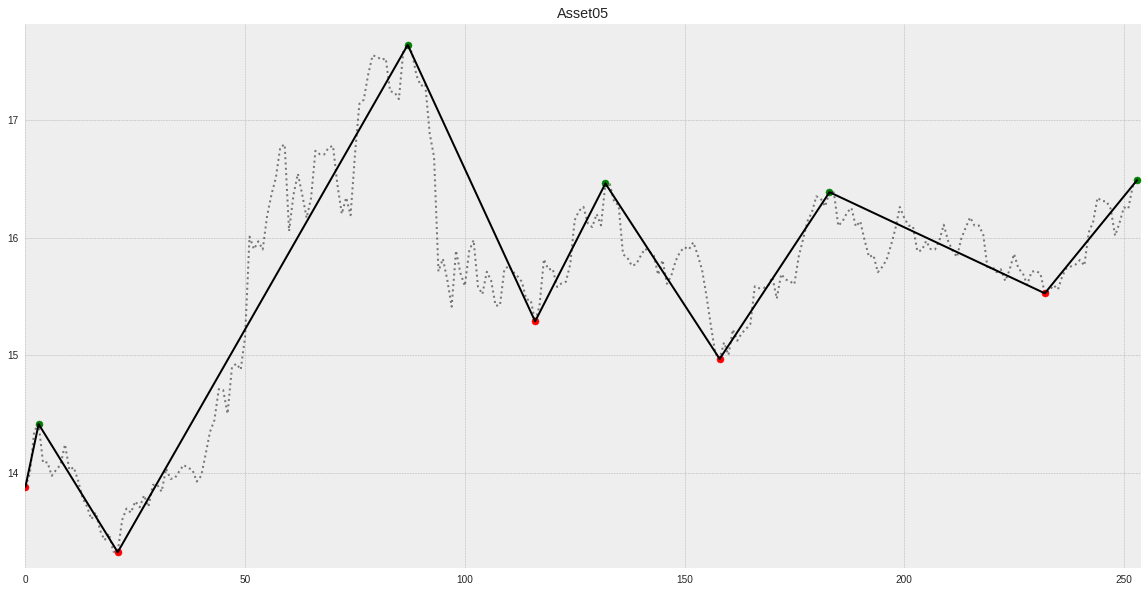

In [ ]:
p = create_graph_zz(df_a1.iloc[-254:], 0.05, "Asset01")
p = create_graph_zz(df_a2.iloc[-254:], 0.05, "Asset02")
p = create_graph_zz(df_a3.iloc[-254:], 0.05, "Asset03")
p = create_graph_zz(df_a4.iloc[-254:], 0.05, "Asset04")
p = create_graph_zz(df_a5.iloc[-254:], 0.05, "Asset05")

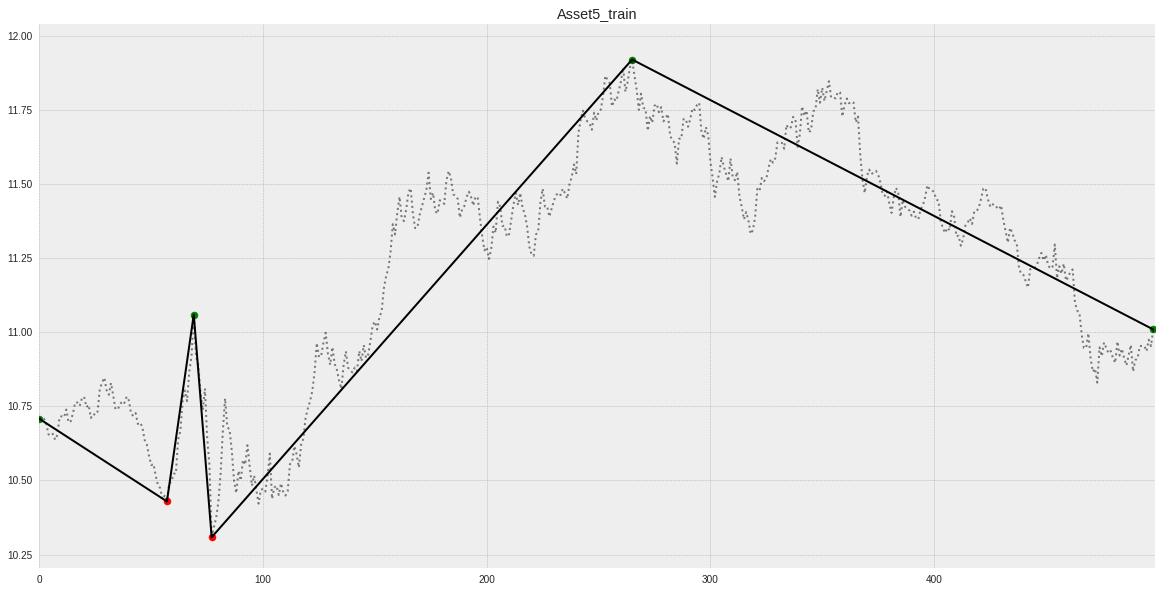

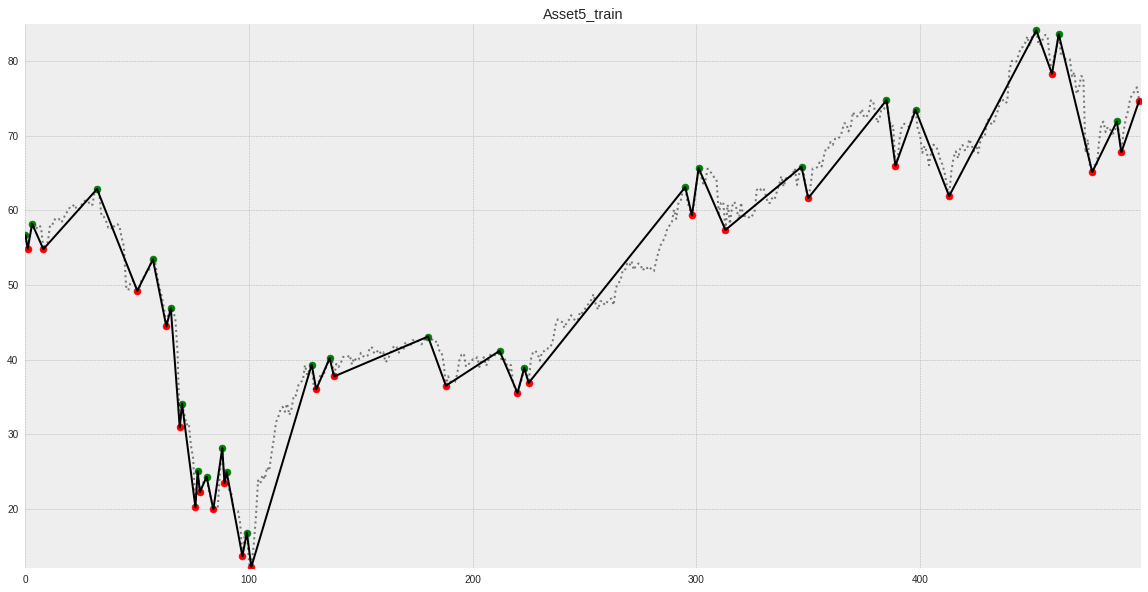

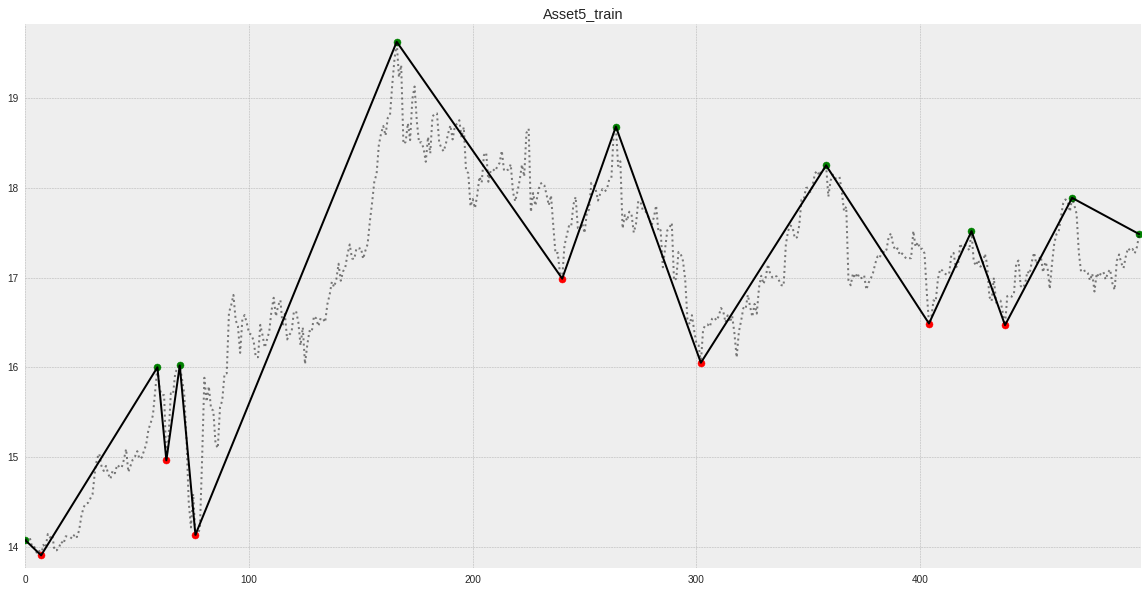

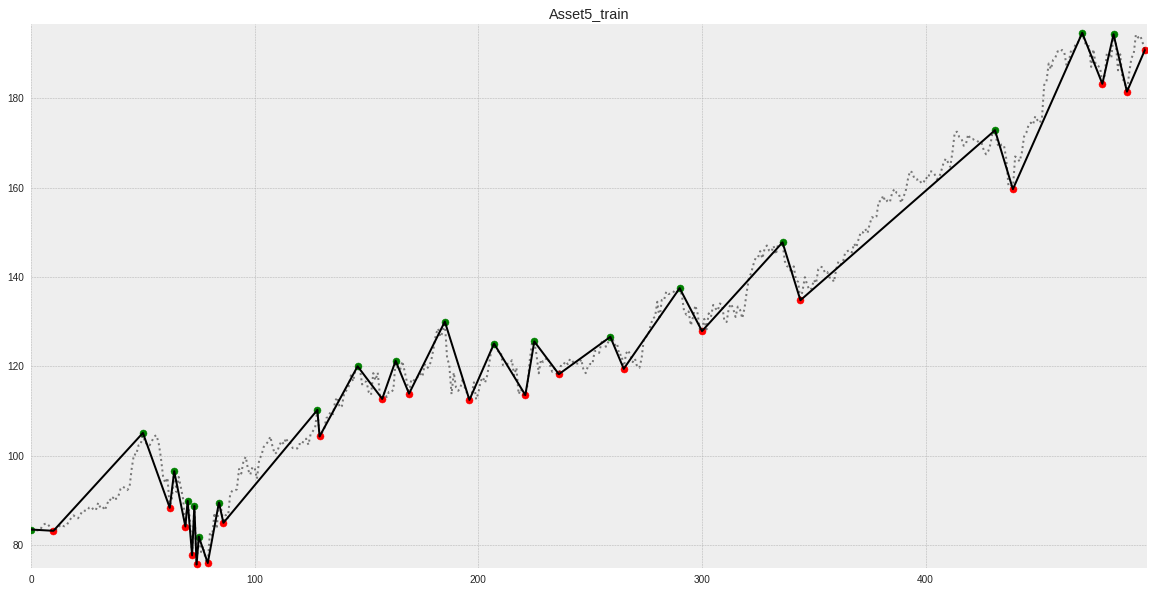

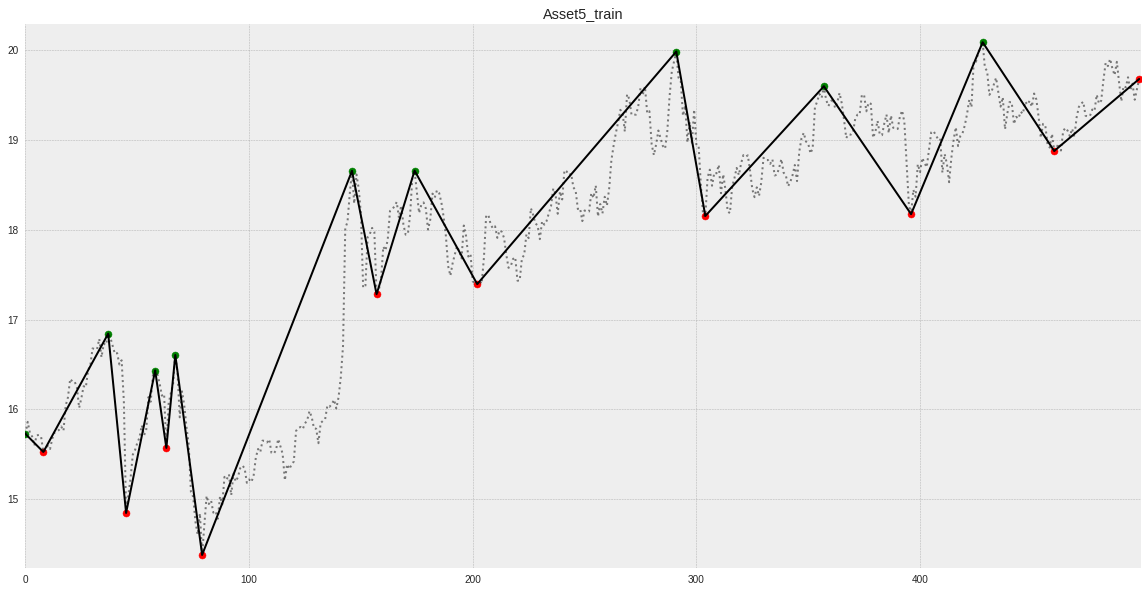

In [ ]:
p = create_graph_zz(df_test_a1.iloc[:], 0.05)
p = create_graph_zz(df_test_a2.iloc[:], 0.05)
p = create_graph_zz(df_test_a3.iloc[:], 0.05)
p = create_graph_zz(df_test_a4.iloc[:], 0.05)
p = create_graph_zz(df_test_a5.iloc[:], 0.05)

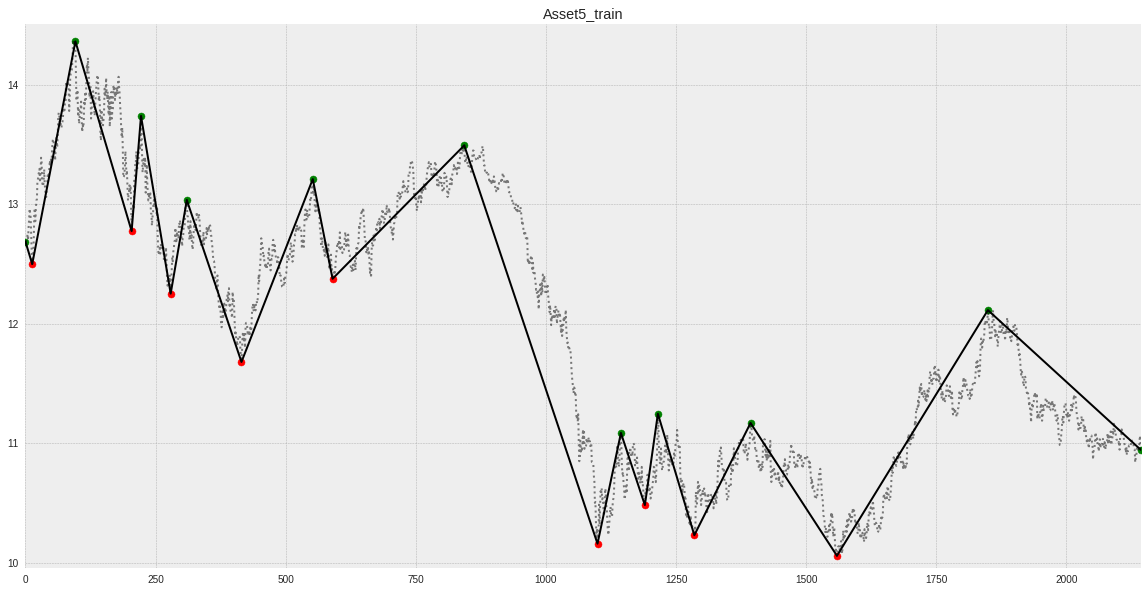

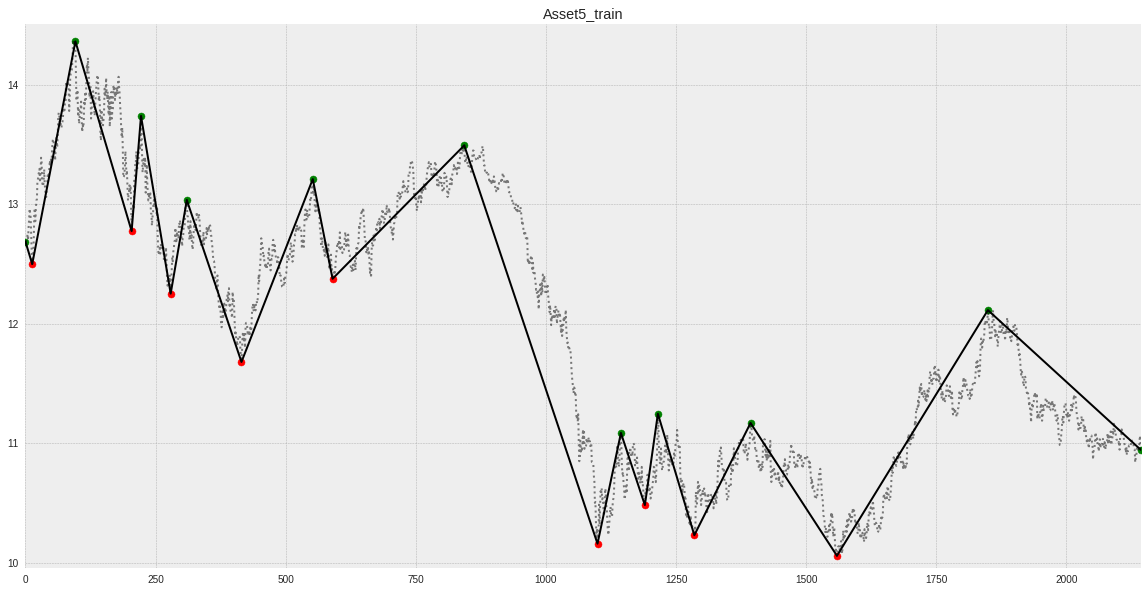

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
p = create_graph_zz(df_test_a1.iloc[:], 0.05)
create_graph_zz(df_test_a1, 0.05)
p

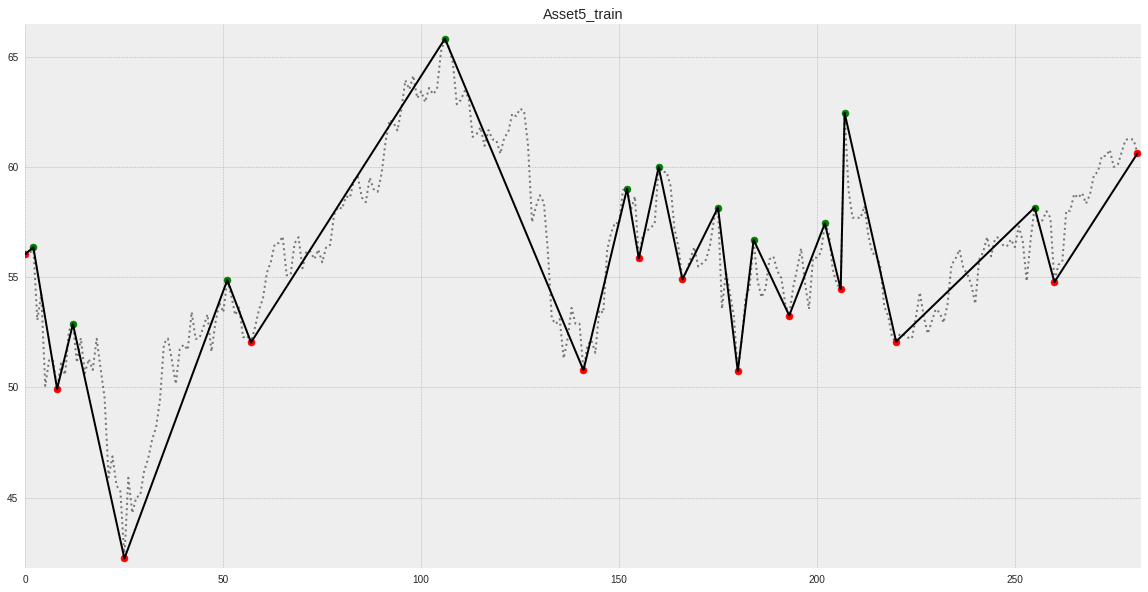

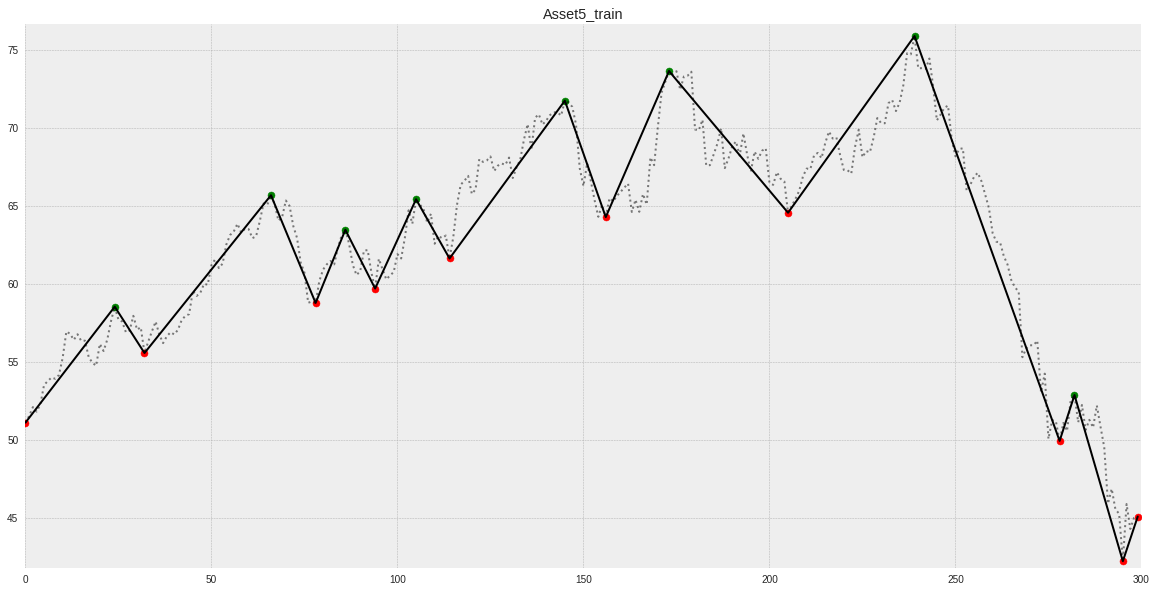

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
create_graph_zz(df_test_a2, 0.05)
create_graph_zz(df_a2[-300:], 0.05)

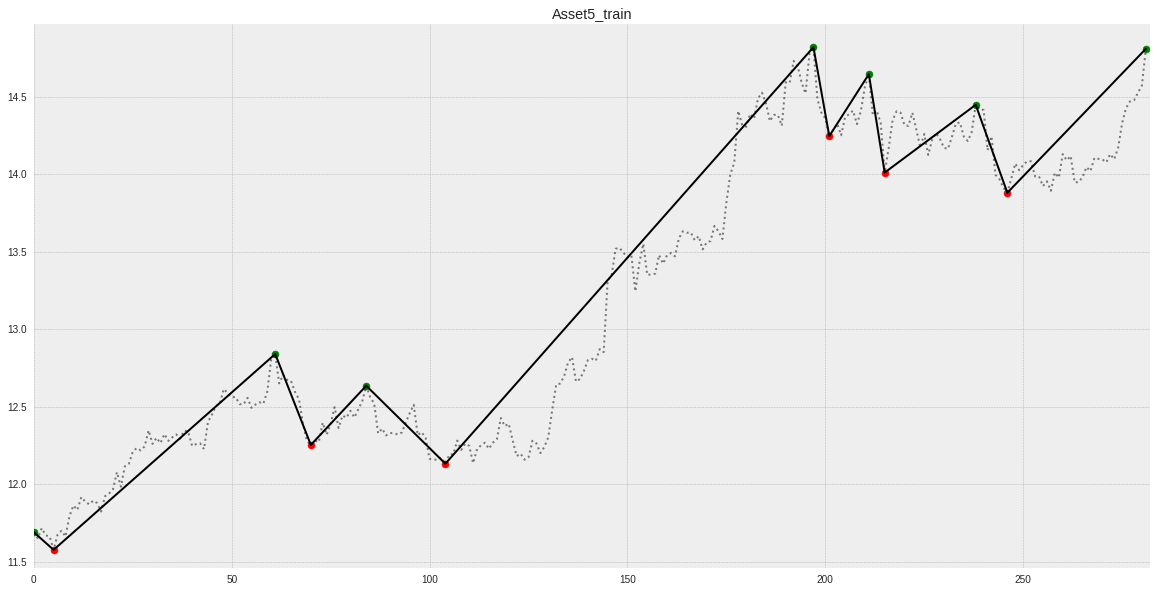

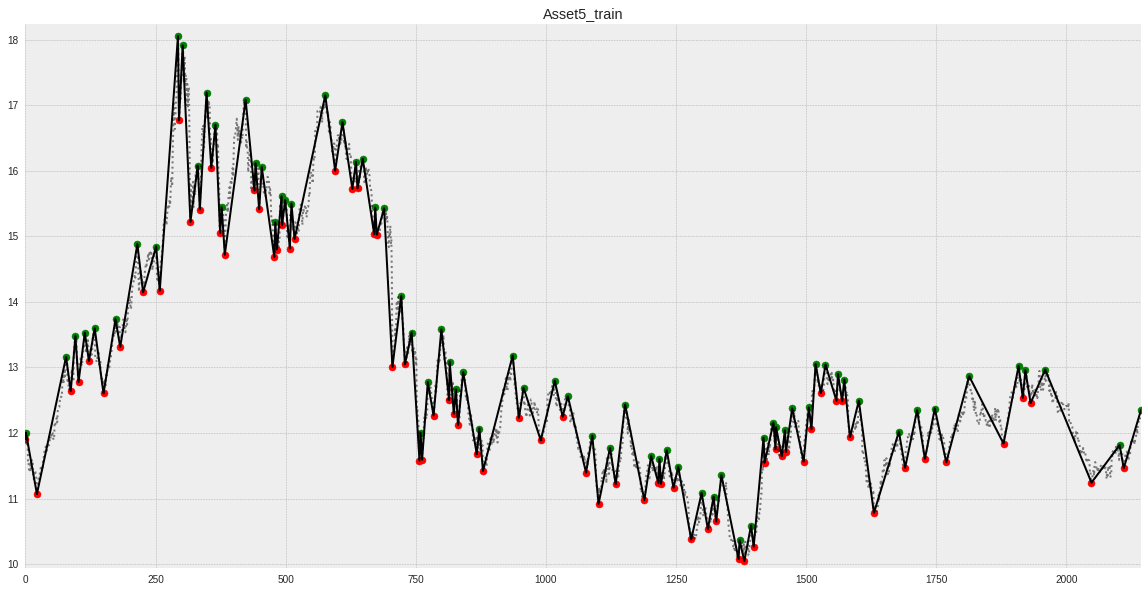

array([-1,  1,  0, ...,  0,  0,  1])

In [ ]:
create_graph_zz(df_test_a3, 0.025)
create_graph_zz(df_a3.iloc[:], 0.025)

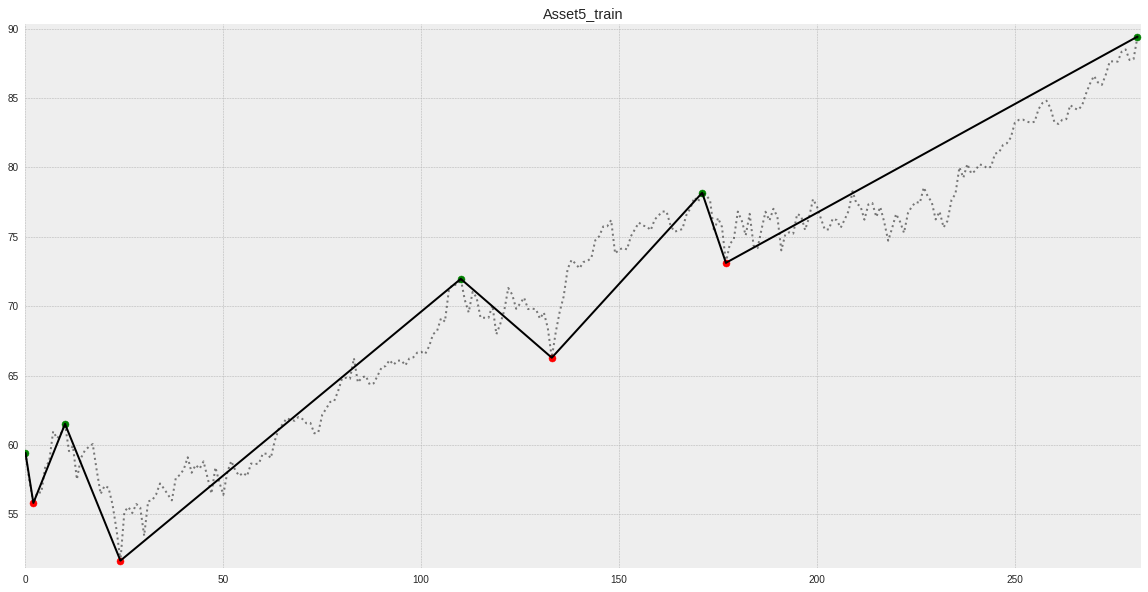

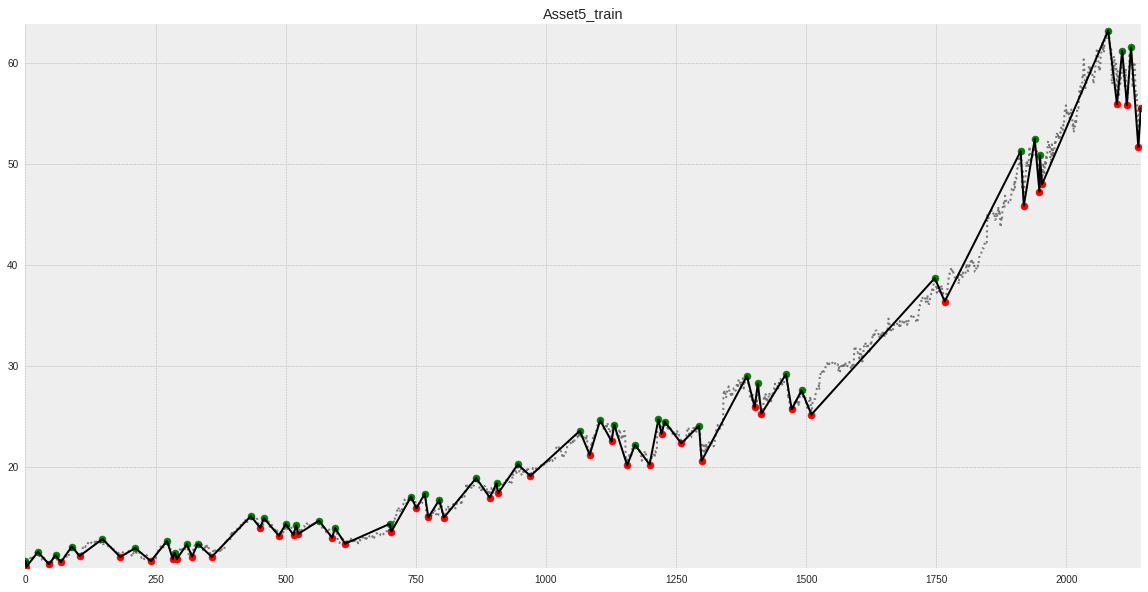

array([ 1,  0, -1, ...,  0,  0, -1])

In [ ]:
create_graph_zz(df_test_a4, 0.05)
create_graph_zz(df_a4, 0.05)

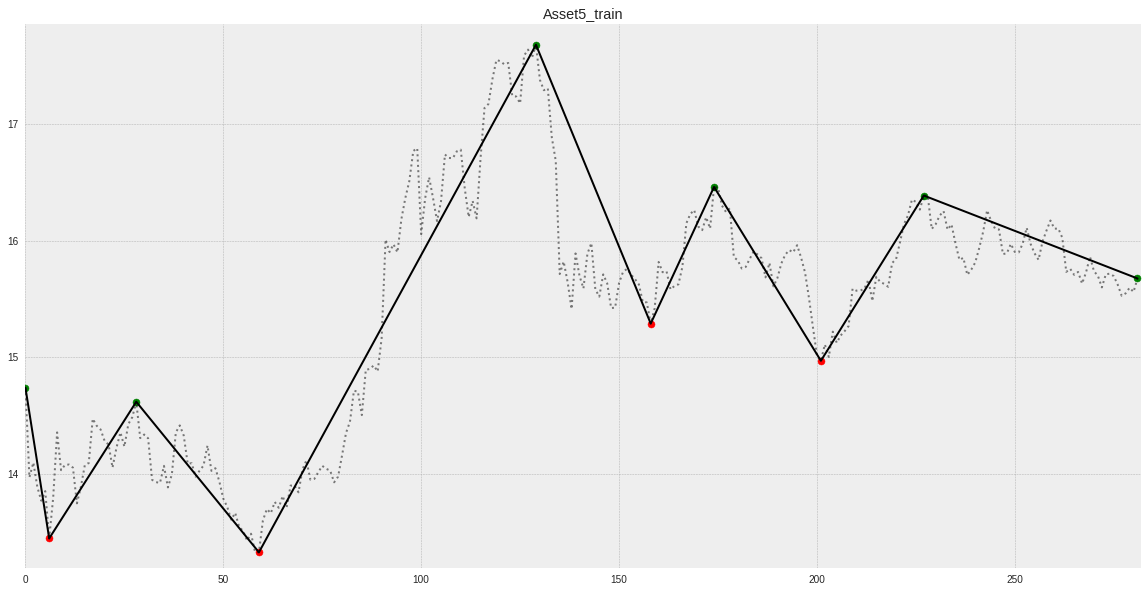

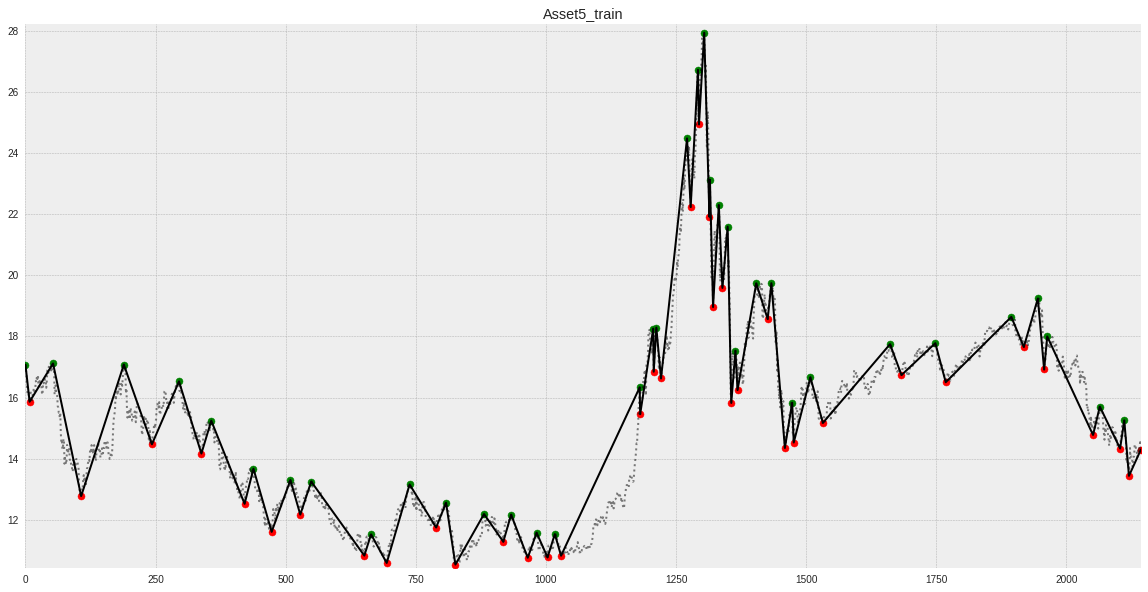

array([ 1,  0,  0, ...,  0,  0, -1])

In [ ]:
create_graph_zz(df_test_a5, 0.05)
create_graph_zz(df_a5[:], 0.05)

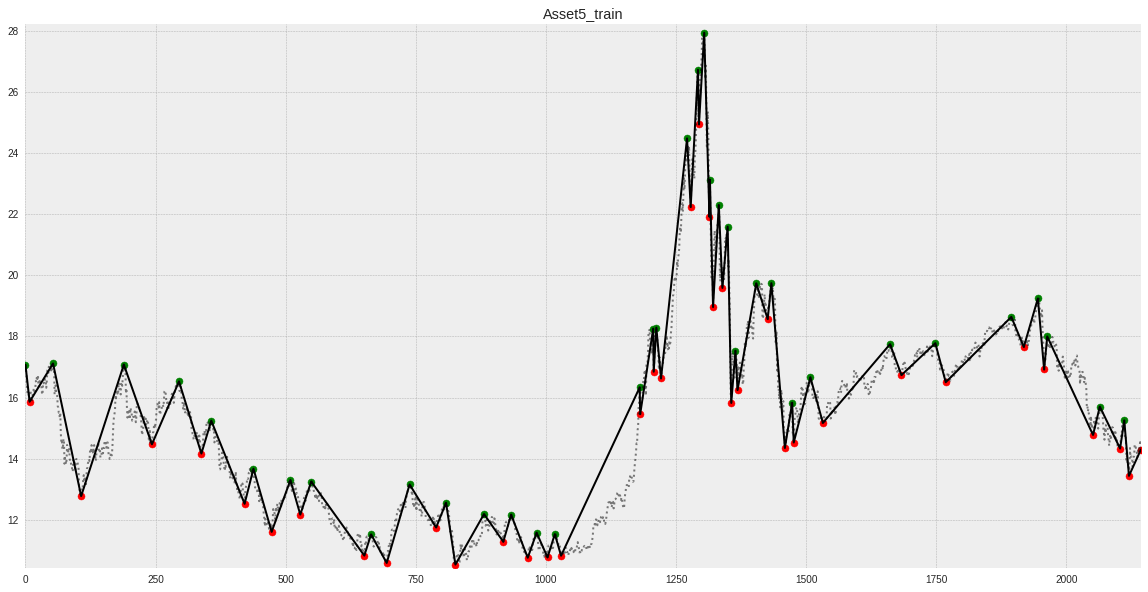

In [ ]:
#create_graph_zz(df_test_a5, 0.05)
df_input = df_a5.iloc[:]
df_input_default = df_a5.iloc[:]

## Scaling

# Scale fitting the close prices separately for inverse_transformations purposes later
close_scaler = RobustScaler()

close_scaler.fit(df_input[['close']])

# Normalizing/Scaling the DF
scaler = RobustScaler()

df_input = pd.DataFrame(scaler.fit_transform(df_input), columns=df_input.columns, index=df_input.index)

df_input['close'] -= np.min(df_input['close'])+1
pivots = create_graph_zz(df_input_default, 0.05)
x = pivots.tolist()
x.insert(0, 0)
x.insert(0, 0)


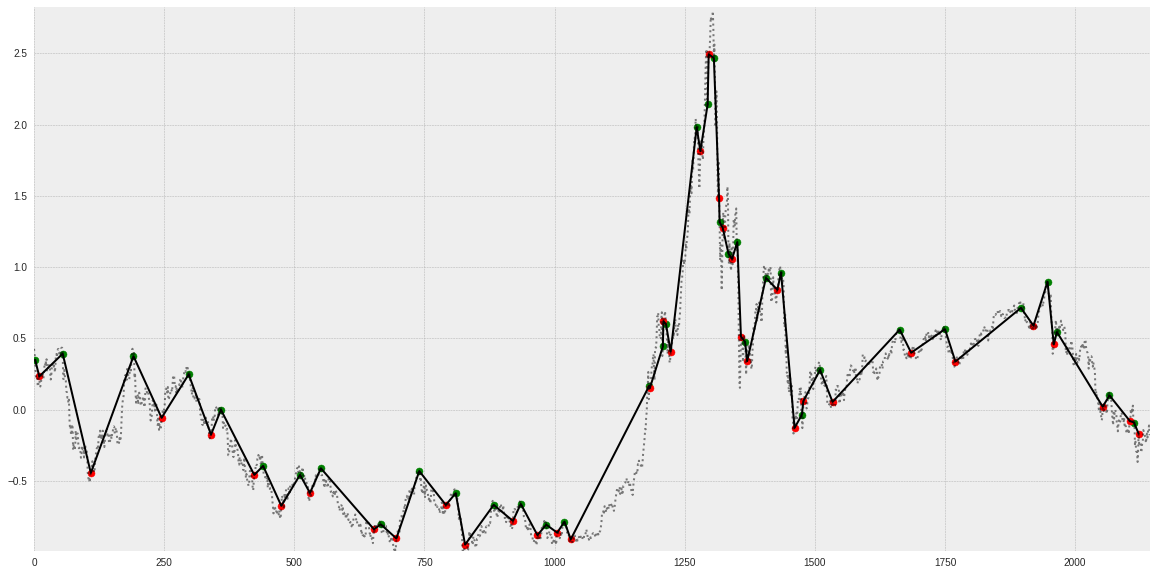

In [ ]:
zigzagPlot(df_input['close'], np.array(x[:-2][:]))

In [ ]:
df_a5

,open,high,low,close,volume
Date,,,,,
2010-06-23,17.052869,17.171583,16.905345,17.078139,114400
2010-06-24,16.861131,17.018485,16.557857,16.914459,137800
2010-06-25,16.777850,16.959933,16.721656,16.729684,78400
2010-06-28,16.732046,16.798816,16.229834,16.324111,93600
2010-06-29,16.330307,16.374136,16.071269,16.146850,76600
...,...,...,...,...,...
2018-12-24,14.317870,14.371922,14.207838,14.231010,238400
2018-12-26,14.230442,14.425246,14.229091,14.425246,207800
2018-12-27,14.433951,14.573378,14.365040,14.484393,242200


In [ ]:
df = ta.add_all_ta_features(df_a5.copy(), open="open", high="high", low="low", close="close", volume="volume", fillna=True)
#df.drop(['open', 'high', 'low', 'volume'], axis=1, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-06-23,17.052869,17.171583,16.905345,17.078139,114400,34095.915362,114400,0.298041,0.000000,0.000000,0.000000,15413.598301,17.051689,50.0,1000.000000,17.078139,17.078139,17.078139,0.000000,0.000000,0.0,0.0,17.051689,17.317928,16.785451,3.122722,0.549674,0.0,0.0,16.905345,17.171583,17.038464,1.558943,0.649021,0.0,0.0,0.000000,0.000000,0.000000,17.078139,...,0.000000,17.038464,17.038464,17.038464,17.038464,0.0,0.0,0.0,0.0,0.000000,15.031796,15.067794,4.0,4.0,0.0,-1.0,-1.000000,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.000000,64.902061,64.902061,-35.097939,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.078139,13.366899,0.000000,0.000000
2010-06-24,16.861131,17.018485,16.557857,16.914459,137800,109655.709047,-23400,0.434797,-22555.124064,-83.666182,-83.666182,13971.030848,16.930706,0.0,1000.000000,16.996299,17.159979,16.832619,1.926068,0.250000,0.0,0.0,16.940978,17.304411,16.577545,4.290581,0.463516,0.0,0.0,16.557857,17.171583,16.864720,3.610941,0.581044,0.0,0.0,-0.013057,-0.002611,-0.010446,16.996299,...,-2.716325,16.864720,16.864720,16.864720,16.864720,0.0,0.0,0.0,0.0,-66.666667,15.031796,15.067794,4.0,8.0,-4.0,-1.0,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,45.339178,58.104394,61.503227,-41.895606,0.0,0.0,-0.076509,-0.015302,-0.061208,1.607348,0.321470,1.285878,17.017057,-0.958419,-0.963041,-0.958419
2010-06-25,16.777850,16.959933,16.721656,16.729684,78400,36538.457505,-101800,0.110522,-21402.445875,15.993591,-33.836296,-2177.150825,16.900601,0.0,989.075902,16.907427,17.192114,16.622741,3.367589,0.187826,0.0,0.0,16.895238,17.216952,16.573523,3.808346,0.242700,0.0,0.0,16.557857,17.171583,16.864720,3.629921,0.279973,0.0,0.0,-0.037878,-0.009665,-0.028213,16.907427,...,-5.743832,16.864720,16.864720,16.864720,16.864720,0.0,0.0,0.0,0.0,-58.472101,15.031796,15.067794,4.0,12.0,-8.0,-1.0,17.171583,0.0,1.0,0.0,0.0,0.0,0.0,-100.0,35.580657,27.997290,50.334582,-72.002710,0.0,0.0,-0.222275,-0.056697,-0.165579,-1.262221,0.004731,-1.266952,16.919970,-1.092410,-1.098420,-2.040359
2010-06-28,16.732046,16.798816,16.229834,16.324111,93600,-26043.572833,-195400,-0.061395,-23768.037931,-198.456424,-88.709672,-3125.565152,16.801379,0.0,989.075902,16.761598,17.323717,16.199479,6.707226,0.110859,0.0,0.0,16.784159,17.167690,16.400627,4.570160,-0.099752,0.0,1.0,16.229834,17.171583,16.700709,5.618493,0.100108,0.0,0.0,-0.089247,-0.025581,-0.063665,16.761598,...,-11.568113,16.700709,16.700709,16.700709,16.700709,0.0,0.0,0.0,0.0,-133.333333,15.031796,15.067794,4.0,16.0,-12.0,-1.0,17.162585,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,28.793616,10.010848,32.037511,-89.989152,0.0,0.0,-0.525351,-0.150427,-0.374923,-2.489407,-0.494096,-1.995311,16.813154,-2.424269,-2.454138,-4.415164
2010-06-29,16.330307,16.374136,16.071269,16.146850,7660

In [ ]:
# Loading in the Data
train_dfs, test_dfs = reset_data()
df_a1, df_a2, df_a3, df_a4, df_a5 = train_dfs[0], train_dfs[1], train_dfs[2], train_dfs[3], train_dfs[4]
df_test_a1, df_test_a2, df_test_a3, df_test_a4, df_test_a5 = test_dfs[0], test_dfs[1], test_dfs[2], test_dfs[3], test_dfs[4]

In [ ]:
df_a2

,open,high,low,close,volume
Date,,,,,
2010-06-23,76.981131,77.288981,74.647468,75.819266,365038
2010-06-24,75.471700,76.037738,74.796427,75.978157,260401
2010-06-25,76.027805,78.639528,75.372397,78.311820,316456
2010-06-28,78.450846,78.828202,77.179745,77.706060,223305
2010-06-29,77.606757,77.775573,74.687191,75.412120,323267
...,...,...,...,...,...
2018-12-24,45.134064,45.918573,42.065543,42.234360,415859
2018-12-26,42.552135,46.673288,42.224431,45.898712,698408
2018-12-27,46.256210,46.375375,44.061569,44.299903,665590


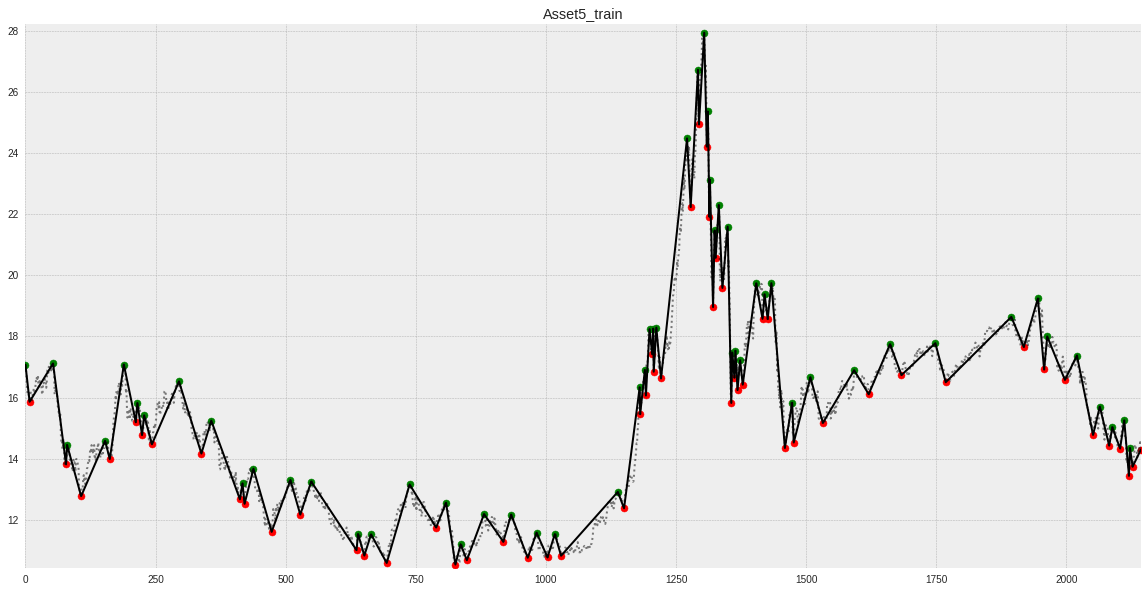

array([ 1,  0,  0, ...,  0,  0, -1])

In [ ]:
pivots = create_graph_zz(df_a5, 0.04)
pivots

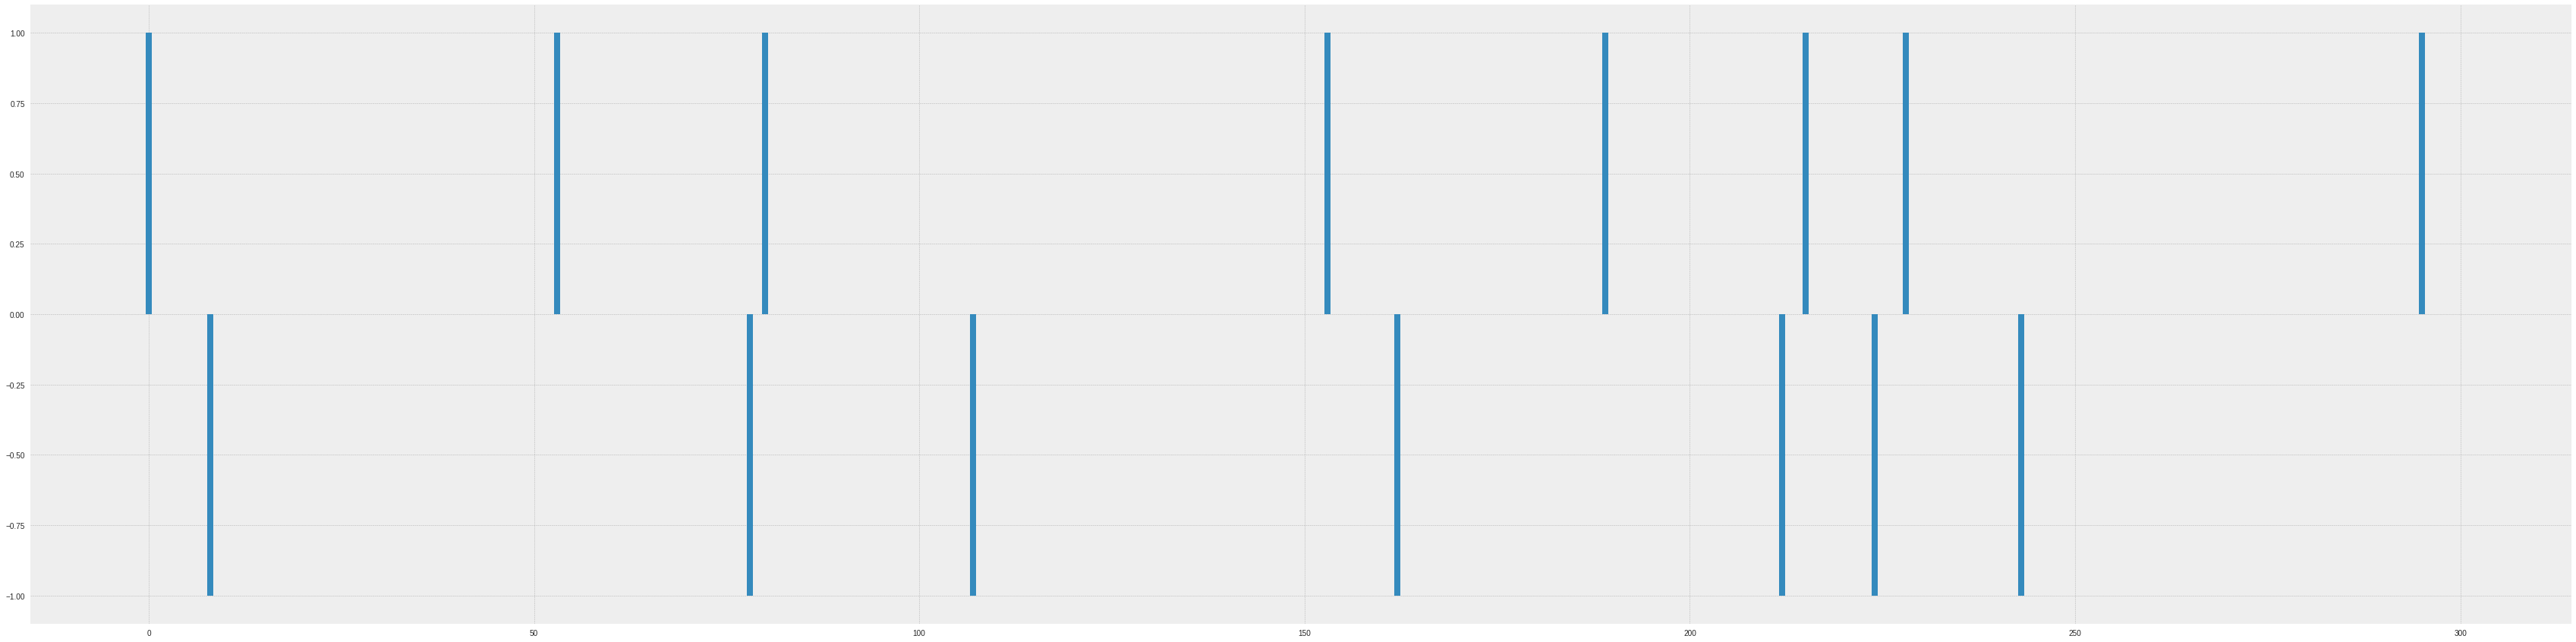

(array([0., 1., 1., ..., 0., 0., 0.], dtype=float32), 2144)

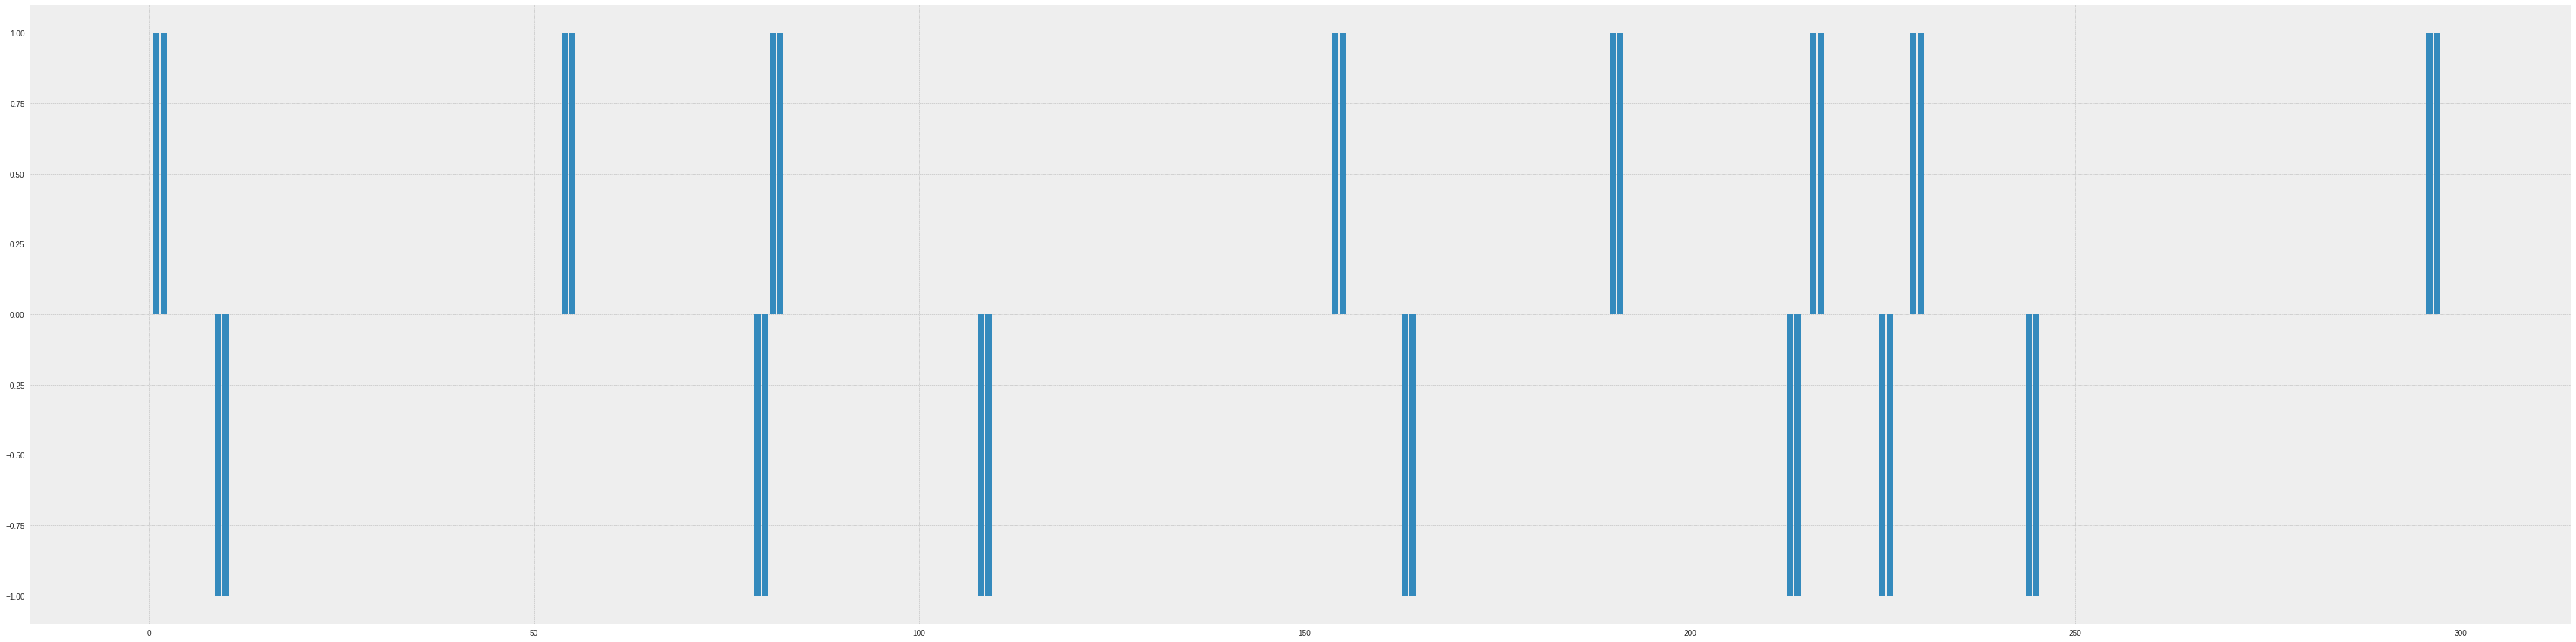

In [ ]:
import matplotlib.pyplot as plt

def create_privot_step(pivots, step=5):


    new_pivots = pivots[:].astype(np.float32)
    step = 5
    dec =1/step
    for i in range(1, step):
        print(1-i*dec)
        new_pivots[i:] += (1-i*dec)*pivots[:-i]
    return new_pivots

def create_future_predit_category_old(pivots, step=3):
    new_pivots = pivots[:].astype(np.float32)
    step = 3
    for i in range(1, step):
        new_pivots[i:] += pivots[:-i]
    return new_pivots

def create_future_predit_category(pivots, step=3):
    new_pivots = pivots[:].astype(np.float32)
    new_pivots[:] = 0.0
    step = 3
    for i in range(1, step):
        if (i > 0):
            new_pivots[i:] += pivots[:-i]
    return new_pivots

plt.figure(figsize=(60, 15))

plt.bar(np.arange(len(pivots))[:300], pivots[:300])
plt.show()
plt.figure(figsize=(60, 15))

new_pivots = create_future_predit_category(pivots)
plt.bar(np.arange(len(new_pivots))[:300], new_pivots[:300])
new_pivots, len(new_pivots)

In [ ]:
new_pivots[160:220]
#df_a5 = df_a5.drop(['label'], axis=1)

array([ 0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -1., -1.,  0.,  1.,  1.,  0.,  0.], dtype=float32)

In [ ]:
def prepare_input_model(df_a5, isTa=True):
    if isTa:
        df = ta.add_all_ta_features(df_a5.copy(), open="open", high="high", low="low", close="close", volume="volume", fillna=True)
    else:
        df = df_a5

    # Scale fitting the close prices separately for inverse_transformations purposes later
    close_scaler = RobustScaler()

    close_scaler.fit(df[['close']])

    # Normalizing/Scaling the DF
    scaler = RobustScaler()

    df_input = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

    #df.drop(['open', 'high', 'low', 'volume'], axis=1, inplace=True)
    df_input.head()
    return df_input

In [ ]:
df_input = prepare_input_model(df_a2)#df_input['label'] = new_pivots
df_input

/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-06-23,0.029181,0.016949,0.003600,0.006573,0.091999,-1.822904,-0.413168,-0.824785,-0.010082,-0.004051,-0.020819,1.058892,0.001050,0.016132,-0.982991,-0.000957,-0.115980,0.096741,-1.239103,-0.918765,0.0,0.0,0.004539,0.018107,-0.003486,0.697583,-0.059298,0.0,0.0,0.082237,-0.083978,-0.006478,-0.977590,-0.170435,-2.522638,-0.809648,-0.057691,-0.056265,0.020229,0.000159,...,0.056150,0.000056,-0.008156,0.001551,-0.009420,-0.484881,-1.756743,-1.971636,-1.952707,-0.058286,-0.054762,-0.068876,-0.722222,-0.611111,-0.155172,-1.703411,-1.768722,0.0,0.0,2.642284,-0.752671,-0.829481,-0.876202,-0.073757,-3.799850,-0.151366,-0.154036,-0.151366,-0.060550,-0.018545,-0.070118,-0.052375,0.055890,-0.008284,-0.014470,-0.042059,0.007716,1.445299,-0.017431,0.006573
2010-06-24,-0.004808,-0.011151,0.006976,0.010139,-0.272586,-1.796558,-0.372626,1.445576,0.206436,-0.446734,-1.080090,1.111179,-0.001910,-2.142606,-0.981364,0.000830,-0.110668,0.094946,-1.191707,0.380307,0.0,0.0,0.000996,-0.001085,0.008847,-0.019282,0.031804,0.0,0.0,0.082237,-0.083978,-0.006478,-0.978030,-0.069743,-2.522638,-0.809648,-0.051325,-0.054869,0.038351,0.001949,...,0.075742,0.000056,-0.008156,0.001551,-0.009420,-0.484881,-1.756743,-1.971636,-1.952707,-0.419107,-0.054762,-0.068876,-0.666667,-0.611111,-0.120690,-1.703411,-1.768722,0.0,0.0,2.642284,-0.752671,-0.829481,-0.876202,3.177023,-1.592602,-0.050545,-0.100760,-0.050545,-0.060550,-0.018545,-0.063842,-0.051058,0.073031,-0.319470,-0.104243,-0.484466,0.009201,0.078199,0.079146,0.010139
2010-06-25,0.007715,0.047279,0.020028,0.062504,-0.077275,-1.768247,-0.323356,2.326384,0.727588,2.759934,2.756435,0.938692,0.010651,0.251542,-0.981364,0.018923,-0.045486,0.065233,-0.566485,0.558678,0.0,0.0,0.013615,0.021343,0.011530,0.418723,0.473356,0.0,0.0,0.082237,-0.054119,0.008712,-0.770070,0.623532,-2.522638,-0.809648,0.047083,-0.032168,0.314886,0.020079,...,0.333707,0.015348,0.007039,0.016620,0.006299,-0.484881,-1.756743,-1.971636,-1.952707,0.482946,-0.054762,-0.068876,-0.611111,-0.611111,-0.086207,-1.703411,0.008466,0.0,1.0,2.642284,-0.752671,-0.829481,-0.876202,3.177023,0.380338,0.643619,0.161539,0.643619,-0.060550,-0.018545,0.032937,-0.029694,0.333909,-0.396310,-0.198228,-0.505227,0.030755,1.395343,1.378194,0.062504
2010-06-28,0.062276,0.051516,0.060985,0.048911,-0.401840,-1.777280,-0.358123,1.466904,0.521083,1.237332,2.820828,0.731075,0.017417,0.794793,-0.987381,0.024564,-0.042630,0.073665,-0.604747,0.249423,0.0,0.0,0.022535,0.026091,0.024696,0.218892,0.238026,0.0,0.0,0.082237,-0.049948,0.010834,-0.742544,0.311641,-2.522638,-0.809648,0.098722,-0.002682,0.402963,0.025730,...,0.357075,0.017485,0.009161,0.018725,0.008495,-0.484881,-1.756743,-1.971636,-1.952707,0.390007,-0.054762,-0.068876,-0.611111,-0.611111,-0.

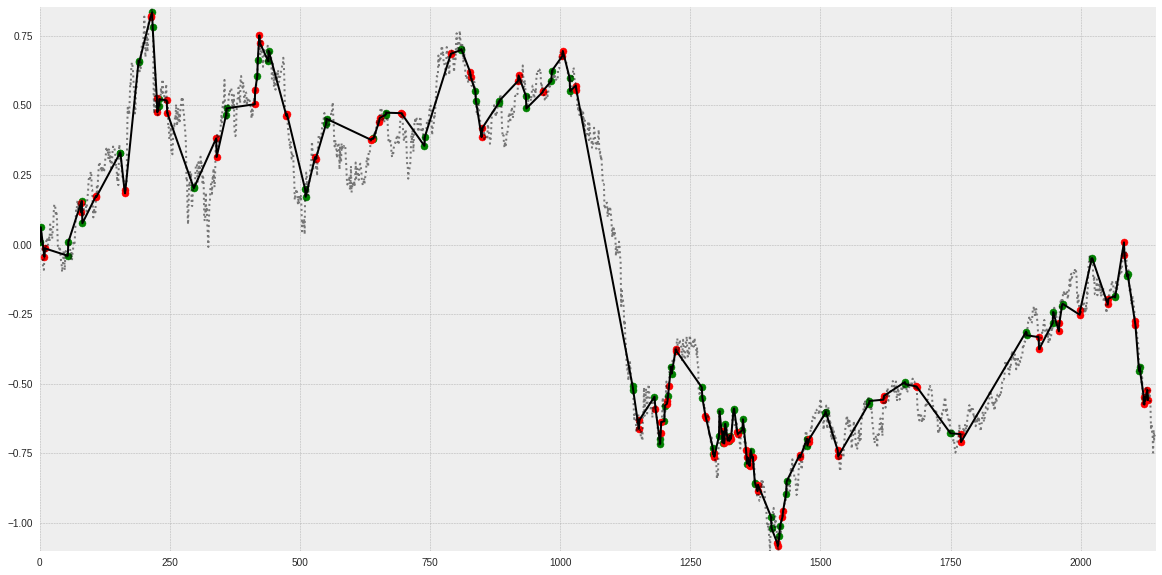

In [ ]:
zigzagPlot(df_input['close'], new_pivots)

In [ ]:
from keras.utils import np_utils
def split_sequence(seq, n_steps_in, n_steps_out, labels):
    """
    Splits the multivariate time sequence
    """
    
    # Creating a list for both variables
    X, y = [], []
    
    for i in range(len(seq)):
        
        # Finding the end of the current sequence
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        # Breaking out of the loop if we have exceeded the dataset's length
        if out_end > len(seq):
            break
        
        # Splitting the sequences into: x = past prices and indicators, y = prices ahead
        seq_x, seq_y = seq[i:end, :], seq[end-1:out_end, 0]
        
        X.append(seq_x)
        y.append(labels[end-1])
    y = np.array(y) + 1
    return np.array(X), y



# How many periods looking back to learn
n_per_in  = 200
# How many periods to predict
n_per_out = 1
# Features 
n_features = df_input.shape[1]
# Splitting the data into appropriate sequences
X, y = split_sequence(df_input.to_numpy(), n_per_in, n_per_out, new_pivots)

yc = np_utils.to_categorical(y)
X.shape, y.shape, y[:10], yc[:10],new_pivots[:10]

((1944, 200, 91),
 (1944,),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32),
 array([ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1.], dtype=float32))

In [ ]:
import random 
class0=list(np.where(new_pivots[-len(X):]==0)[0])
class1=list(np.where(new_pivots[-len(X):] !=0)[0])

list_a = list(np.arange(len(class0)))[:1*len(class1)]
ra = random.shuffle(list_a)

len(np.where(new_pivots==0)[0]), len(np.where(new_pivots!=0)[0]), len(list_a)
list_a.extend(class1)
len(set(list_a))
X2 = X[list_a]
yc2 = np_utils.to_categorical(y[list_a])
len(class0), len(class1), X2.shape

(1748, 196, (392, 200, 91))

In [ ]:
# Neural Network library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow


def layer_maker(n_layers, n_nodes, drop=None, d_rate=.7):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes,  return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass
          

model = Sequential()

# Activation
activ = "tanh"

model.add( tensorflow.keras.layers.Input(shape=(n_per_in,n_features)))

"""model.add( tensorflow.keras.layers.Conv1D(filters=32, kernel_size=11,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]))
model.add( tensorflow.keras.layers.Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]))"""
model.add( tensorflow.keras.layers.Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]))

# Input layer
model.add(LSTM(64, 
               activation=activ, 
               return_sequences=True, 
               input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=1, n_nodes=64)

# Final Hidden layer
model.add(LSTM(256, dropout=0.25))
model.add(Dense(64, activation='relu') )
model.add(Dense(64, activation='relu') )
# Output layer
model.add(Dense(3, activation='softmax'))

# Model summary
model.summary()

# Compiling the data with selected specifications
model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 200, 32)           8768      
                                                                 
 lstm_75 (LSTM)              (None, 200, 64)           24832     
                                                                 
 lstm_76 (LSTM)              (None, 200, 64)           33024     
                                                                 
 lstm_77 (LSTM)              (None, 256)               328704    
                                                                 
 dense_71 (Dense)            (None, 64)                16448     
                                                                 
 dense_72 (Dense)            (None, 64)                4160      
                                                                 
 dense_73 (Dense)            (None, 3)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
res = model.fit(X2, yc2, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/50
9/9 [==============================] - 5s 179ms/step - loss: 1.0146 - accuracy: 0.7737 - val_loss: 1.0720 - val_accuracy: 0.4492
Epoch 2/50
9/9 [==============================] - 0s 42ms/step - loss: 0.8166 - accuracy: 0.8029 - val_loss: 1.1006 - val_accuracy: 0.4492
Epoch 3/50
9/9 [==============================] - 0s 42ms/step - loss: 0.6335 - accuracy: 0.8029 - val_loss: 1.3600 - val_accuracy: 0.4492
Epoch 4/50
9/9 [==============================] - 0s 41ms/step - loss: 0.6154 - accuracy: 0.8029 - val_loss: 1.2404 - val_accuracy: 0.4492
Epoch 5/50
9/9 [==============================] - 0s 42ms/step - loss: 0.6058 - accuracy: 0.8029 - val_loss: 1.1801 - val_accuracy: 0.4492
Epoch 6/50
9/9 [==============================] - 0s 42ms/step - loss: 0.5958 - accuracy: 0.8029 - val_loss: 1.2636 - val_accuracy: 0.4492
Epoch 7/50
9/9 [==============================] - 0s 42ms/step - loss: 0.5849 - accuracy: 0.8029 - val_loss: 1.2616 - val_accuracy: 0.4492
Epoch 8/50
9/9 [==========

In [ ]:
res = model.fit(X2, yc2, epochs=100, batch_size=32, validation_split=0.5)

Epoch 1/100
4/4 [==============================] - 0s 31ms/step - loss: 0.1685 - accuracy: 0.9630 - val_loss: 0.1559 - val_accuracy: 0.9722
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1659 - accuracy: 0.9630 - val_loss: 0.1565 - val_accuracy: 0.9722
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 0.1666 - accuracy: 0.9630 - val_loss: 0.1576 - val_accuracy: 0.9722
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 0.1675 - accuracy: 0.9630 - val_loss: 0.1573 - val_accuracy: 0.9722
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.1653 - accuracy: 0.9630 - val_loss: 0.1569 - val_accuracy: 0.9722
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 0.1654 - accuracy: 0.9630 - val_loss: 0.1567 - val_accuracy: 0.9722
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1625 - accuracy: 0.9630 - val_loss: 0.1580 - val_accuracy: 0.9722
Epoch 8/100
4/4 [===

/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


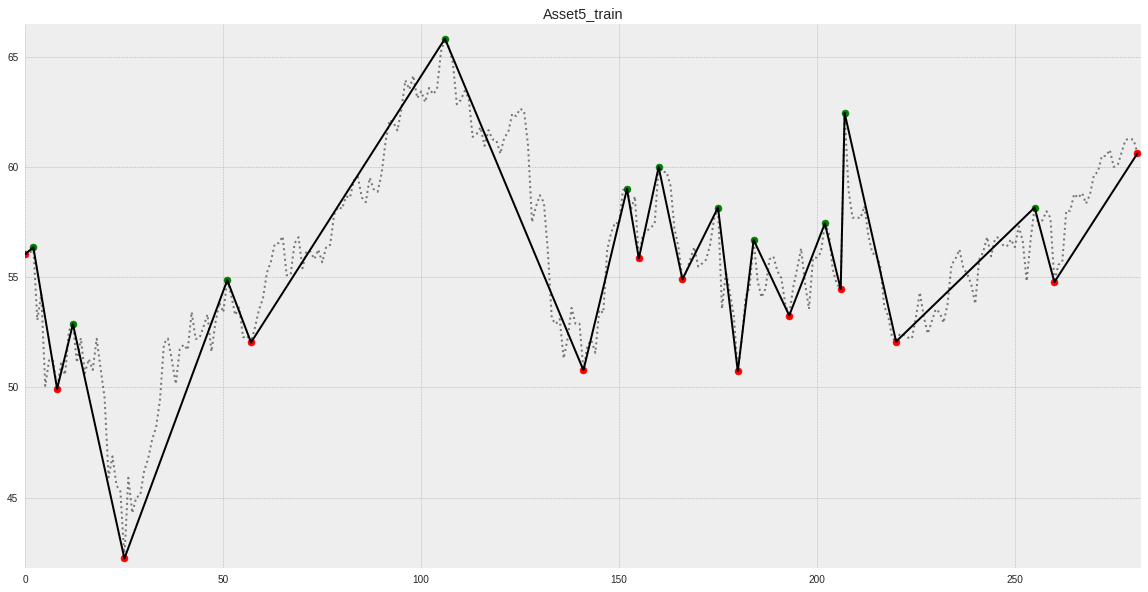

(282,)

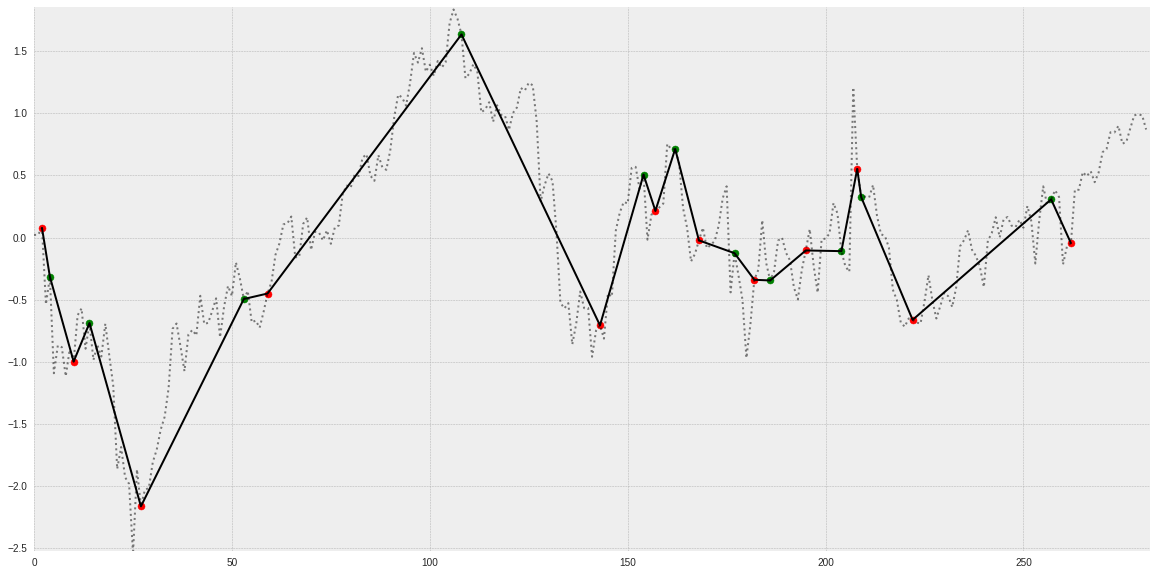

In [ ]:
df_test = test_dfs[1]
df_test = df_test.drop(['predict'],axis=1)
df_input_test = prepare_input_model(df_test.iloc[:])#df_input['label'] = new_pivots
df_test.head()
test_pivots = create_graph_zz(df_test.iloc[:], 0.05)
new_test_pivots = create_future_predit_category(test_pivots, step=5)
zigzagPlot(df_input_test['close'], new_test_pivots)
new_test_pivots.shape

In [ ]:
df_test

,open,high,low,close,volume
Date,,,,,
2018-11-15,55.630588,56.861966,55.203577,56.067528,256499
2018-11-16,56.186697,57.557101,55.501491,56.067528,159001
2018-11-19,56.325723,56.931483,54.697124,56.365442,699684
2018-11-20,56.991064,57.040715,52.403180,53.058592,983120
2018-11-21,53.018869,55.471700,53.018869,54.250251,734277
...,...,...,...,...,...
2019-12-24,60.208543,60.734858,60.049655,60.685206,204535
2019-12-26,60.774581,61.400202,60.635554,61.251243,265091
2019-12-27,61.300895,61.539228,60.814303,61.290966,351899


In [ ]:
df_input_test

,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-11-15,-0.073214,0.019417,0.007408,0.021179,-1.886896,-0.613150,-1.903755,0.003953,-0.074342,-0.083924,-0.012212,-0.030410,0.053658,-0.219282,-0.864784,0.151213,-0.666521,0.895734,-1.580579,-1.257149,0.0,0.0,0.027808,0.029160,0.044741,-0.096101,-0.154551,0.0,0.0,1.014457,-0.424384,0.163531,-1.327515,-0.190284,-3.312900,-0.608208,-0.140025,-0.073376,-0.127238,0.054798,...,0.000000,0.100977,0.180645,0.198121,-0.144460,-0.719493,-1.645684,-2.735510,-2.105554,-0.254799,0.097670,-0.063064,-0.842105,-0.466667,-0.369748,-11.616589,-11.419356,0.0,0.0,3.106963,-0.894776,-0.954730,-0.994837,-0.138102,-3.675405,-0.221584,-0.193852,-0.221584,-0.244577,-0.206787,-0.138910,-0.069065,-0.071841,-0.032255,-0.005653,-0.061111,0.127658,0.027636,-0.068884,0.021179
2018-11-16,0.026786,0.155340,0.062963,0.021179,-2.354337,-0.632360,-1.872530,-0.904956,-0.074342,2.350120,3.826826,-0.040180,0.084695,2.102078,-0.864784,0.151213,-0.666521,0.895734,-1.580579,-1.257149,0.0,0.0,0.065335,0.110470,0.037562,0.240825,-0.222070,0.0,0.0,1.014457,-0.294091,0.259323,-1.155631,-0.449771,-3.312900,-0.608208,-0.140025,-0.073376,-0.127238,0.054798,...,0.000000,0.176981,0.286907,0.312500,-0.046284,-0.719493,-1.645684,-2.735510,-2.105554,0.125660,0.097670,-0.063064,-0.842105,-0.466667,-0.369748,-11.616589,-11.419356,0.0,0.0,3.106963,-0.894776,-0.954730,-0.994837,-0.138102,-2.606668,-0.492480,-0.336427,-0.492480,-0.244577,-0.206787,-0.138910,-0.069065,-0.071841,-0.354953,-0.081906,-0.583214,0.127658,-0.074313,-0.068884,0.021179
2018-11-19,0.051786,0.033010,-0.087037,0.076427,0.237897,-0.539539,-1.735124,1.034838,0.041230,-0.949688,1.224554,0.112824,0.058098,-1.676245,-0.864784,0.179385,-0.568892,0.857518,-1.445341,0.366346,0.0,0.0,0.049324,0.122790,-0.005038,0.463944,-0.079963,0.0,0.0,0.891566,-0.294091,0.189532,-1.031651,-0.085094,-3.312900,-0.608208,-0.124314,-0.070003,-0.082238,0.078886,...,0.043838,0.121607,0.209488,0.229167,-0.117812,-0.719493,-1.645684,-2.735510,-2.105554,-0.596144,0.097670,-0.063064,-0.736842,-0.466667,-0.302521,-11.616589,-0.076328,0.0,1.0,3.106963,-0.894776,-0.954730,-0.994837,4.140784,-1.041364,-0.111769,-0.250371,-0.111769,-0.244577,-0.206787,-0.123459,-0.065806,-0.027635,1.041704,0.187118,1.780902,0.153218,0.162160,0.167222,0.076427
2018-11-20,0.171428,0.054369,-0.514814,-0.536832,1.596794,-0.729184,-1.928192,-1.168328,-1.777814,-2.037777,-0.214924,-2.706487,-0.159444,-2.130219,-0.864784,-0.041061,-0.146500,0.184222,-0.260970,-1.126394,0.0,0.0,-0.062446,0.160919,-0.255907,1.660576,-0.893498,0.0,0.0,0.334940,-0.294091,-0.126582,-0.447587,-0.854375,-3.312900,-0.608208,-0.286569,-0.102144,-0.555996,-0.109597,...,-0.353031,-0.129207,-0.141177,-0.148285,-0.441795,-0.719493,-1.645684,-2.735510,-2.105554,-1.015717,0.0

In [ ]:
Xt, yt = split_sequence(df_input_test.to_numpy(), n_per_in, n_per_out, new_test_pivots)
Xt.shape, yt.shape
yc = np_utils.to_categorical(yt)
X.shape, yt.shape, yt[:10], yc[:10],new_pivots[:10]

((1944, 200, 91),
 (82,),
 array([1., 1., 1., 1., 1., 2., 1., 1., 1., 0.], dtype=float32),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [ ]:
yp = model.predict(Xt)
len(yp)

82

In [ ]:
yps = []
for i in range(len(yt)):
    yps.append(np.argmax(yp[i]) - 1)


In [ ]:
pred_df = df_input_test.iloc[30:]
pred_df["pred"] = np.array(yps) 
pred_df.to_csv("ta2-0.05v2.csv")

ValueError: ignored

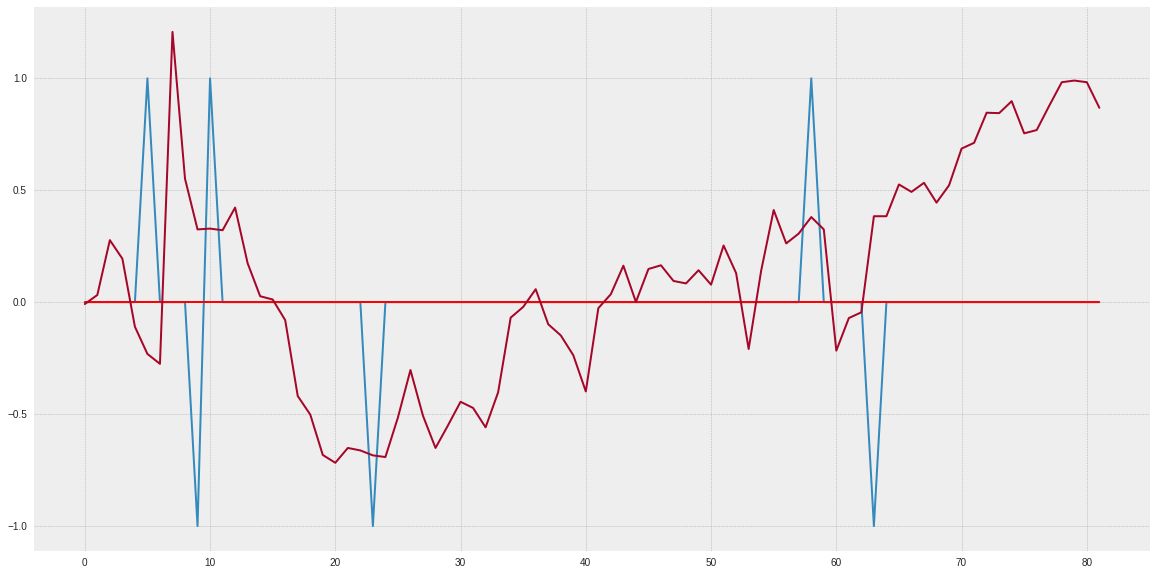

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(yt)), yt-1)
plt.plot(np.arange(len(yt)), yps, color='red')
plt.plot(np.arange(len(yt)), df_input_test['close'][-len(yps):])

In [ ]:
model.evaluate(Xt, yc)

8/8 [==============================] - 0s 5ms/step - loss: 0.5357 - accuracy: 0.9286


[0.5356590747833252, 0.9285714030265808]

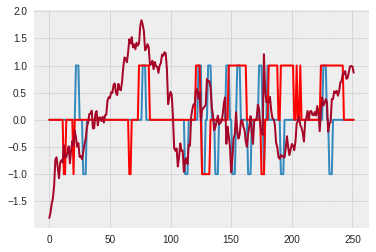

In [ ]:
plt.plot(np.arange(len(yt)), yt-1)
plt.plot(np.arange(len(yt)), yps, color='red')
plt.plot(np.arange(len(yt)), df_input_test['close'][-len(yps):])